<a href="https://colab.research.google.com/github/thakarekundan/git-tutorial/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA VISULALIZATION USING MATPLOTLIB** (FOR HANDLING MISSING VALUES)

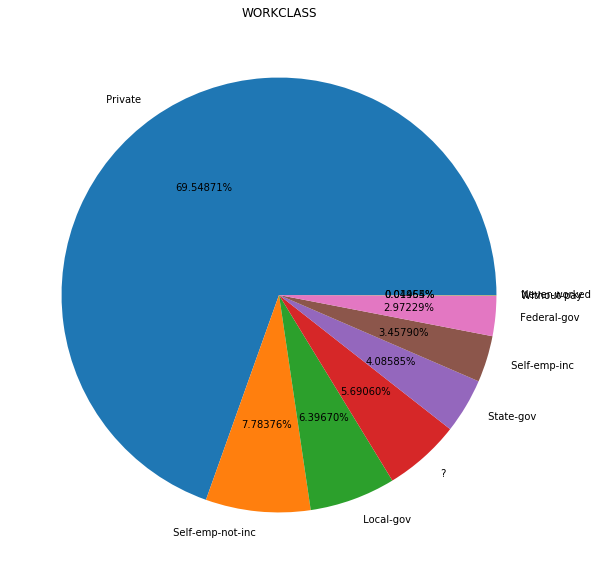

[' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov', ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked']


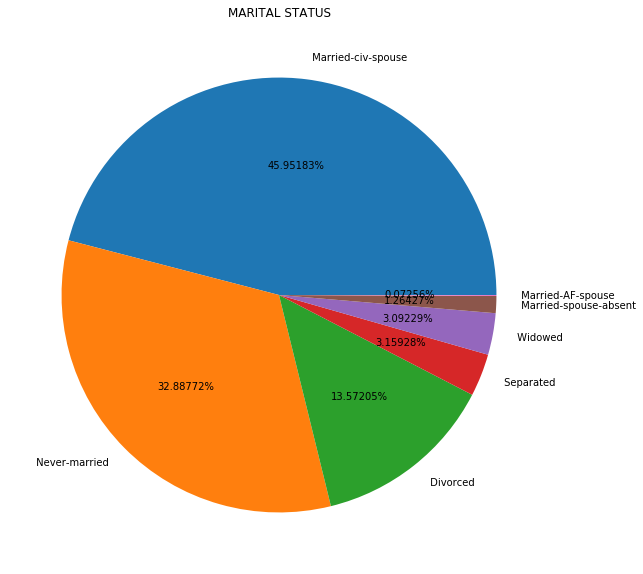

[' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated', ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse']


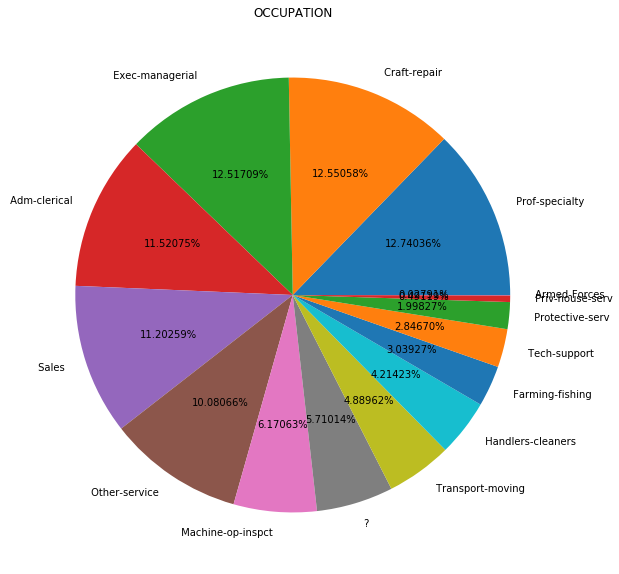

[' Prof-specialty', ' Craft-repair', ' Exec-managerial', ' Adm-clerical', ' Sales', ' Other-service', ' Machine-op-inspct', ' ?', ' Transport-moving', ' Handlers-cleaners', ' Farming-fishing', ' Tech-support', ' Protective-serv', ' Priv-house-serv', ' Armed-Forces']


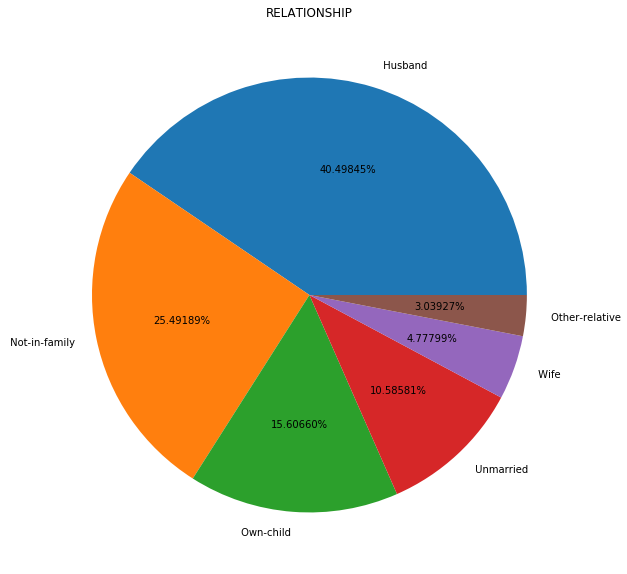

[' Husband', ' Not-in-family', ' Own-child', ' Unmarried', ' Wife', ' Other-relative']


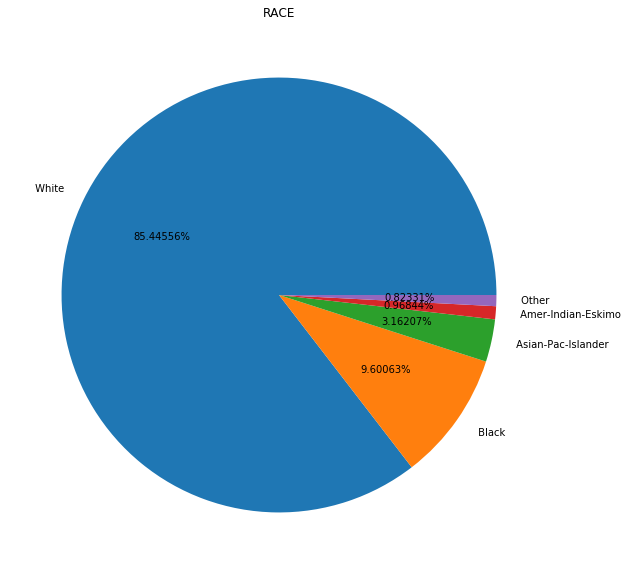

[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other']


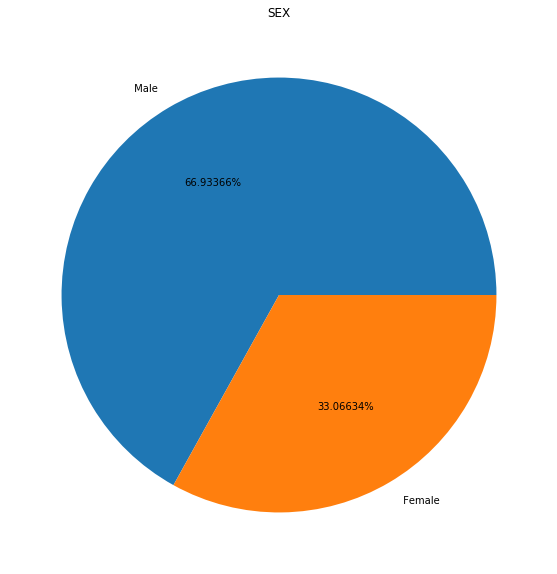

[' Male', ' Female']


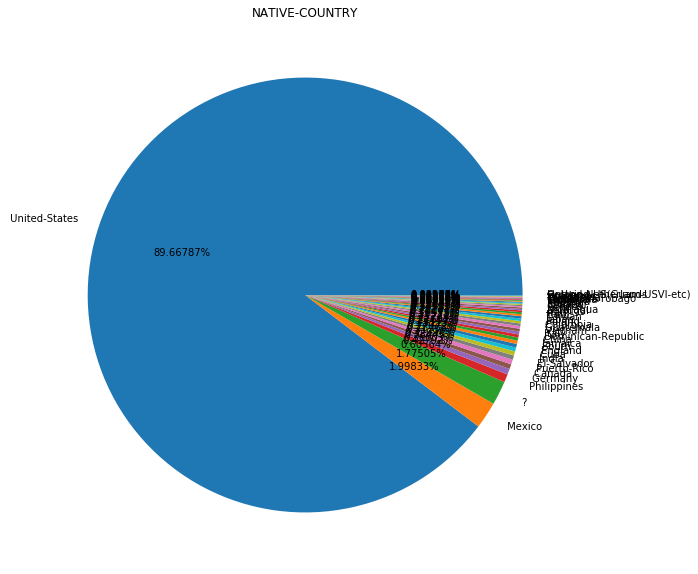

[' United-States', ' Mexico', ' ?', ' Philippines', ' Germany', ' Canada', ' Puerto-Rico', ' El-Salvador', ' India', ' Cuba', ' England', ' South', ' Jamaica', ' China', ' Dominican-Republic', ' Italy', ' Vietnam', ' Guatemala', ' Columbia', ' Poland', ' Japan', ' Taiwan', ' Haiti', ' Iran', ' Portugal', ' Nicaragua', ' Peru', ' Greece', ' Ecuador', ' France', ' Ireland', ' Thailand', ' Hong', ' Cambodia', ' Laos', ' Trinadad&Tobago', ' Yugoslavia', ' Honduras', ' Hungary', ' Scotland', ' Outlying-US(Guam-USVI-etc)', ' Holand-Netherlands']


In [2]:
import matplotlib.pyplot as plt
from pandas import read_csv, DataFrame
import pandas as pd


def load_dataset(filename):
  df = pd.read_csv(filename)
  return df



def convert_to_pie(df,attribute_name):
      plt.figure(figsize=(10,10))
      labels =(list(df[attribute_name].value_counts().to_dict().keys()))
      values=(list(df[attribute_name].value_counts().to_dict().values()))
      plt.pie(values,labels=labels,autopct="%.5f%%")
      plt.title(attribute_name)
      plt.show()
      print(list(df[attribute_name].value_counts().to_dict().keys()))

filename = 'adult_dataset.csv'
dataset=load_dataset(filename)
convert_to_pie(dataset,'WORKCLASS')
convert_to_pie(dataset,'MARITAL STATUS')
convert_to_pie(dataset,'OCCUPATION')
convert_to_pie(dataset,'RELATIONSHIP')
convert_to_pie(dataset,'RACE')
convert_to_pie(dataset,'SEX')
convert_to_pie(dataset,'NATIVE-COUNTRY')
  

now by analysing data processing start 

In [33]:


from pandas import read_csv
import pandas as pd
import csv

#Load the dataset
def loadDataSet(filename):
    df = pd.read_csv(filename)
    return df

#1. Strategy 1 : REPLACING MISSING VALUES WITH THE MOST FREQUENT VALUE IN THE ATTRIBUTE
def replace_missing(data_set):
          data_set['WORKCLASS'] = data_set['WORKCLASS'].replace(to_replace = ' ?', value = ' Private')
          data_set['EDUCATION'] = data_set['EDUCATION'].replace(to_replace = ' ?', value = ' HS-grad')
          data_set['MARITAL STATUS'] = data_set['MARITAL STATUS'].replace(to_replace = ' ?', value = ' Married-civ-spouse')
          data_set['OCCUPATION'] = data_set['OCCUPATION'].replace(to_replace = ' ?', value = ' Prof-specialty')
          data_set['RELATIONSHIP'] = data_set['RELATIONSHIP'].replace(to_replace = ' ?', value = ' Husband')
          data_set['RACE'] = data_set['RACE'].replace(to_replace = ' ?', value = ' White')
          data_set['SEX'] = data_set['SEX'].replace(to_replace = ' ?', value = ' Male')
          data_set['NATIVE-COUNTRY'] = data_set['NATIVE-COUNTRY'].replace(to_replace = ' ?', value = ' United-States')
          data_set = data_set.to_csv('DATA-replaced-missing.csv', sep =',', index = False)
          data = pd.read_csv("DATA-replaced-missing.csv")
          print("SIZE OF DATASET WITH REPLACING MISSING VALUES WITH MAXIMUN FREQUENCY",data.shape)
          return data.shape
          

#2. Strategy 2 : REMOVING MISSING VALUES FROM THE DATASET. HERE WE LOSE A COUPLE THOUSAND ROWS
def remove_missing(data_set):
          
          data_set = data_set[data_set['WORKCLASS'] != ' ?']
          data_set = data_set[data_set['EDUCATION'] != ' ?']
          data_set = data_set[data_set['MARITAL STATUS'] != ' ?']
          data_set = data_set[data_set['OCCUPATION'] != ' ?']
          data_set = data_set[data_set['RELATIONSHIP'] != ' ?']
          data_set = data_set[data_set['RACE'] != ' ?']
          data_set = data_set[data_set['SEX'] != ' ?']
          data_set = data_set[data_set['NATIVE-COUNTRY'] != ' ?']
          data_set = data_set.to_csv('DATA-removed-missing.csv', sep = ',', index = False)
          data = pd.read_csv("DATA-removed-missing.csv")
          print("SIZE OF DATASET WITH REMOVING MISSING VALUES",data.shape)
          return data.shape

filename = 'adult_dataset.csv'
df = loadDataSet(filename)        
df.columns = ['AGE','WORKCLASS','FNLWGT','EDUCATION','EDUCATION-NUM','MARITAL STATUS','OCCUPATION','RELATIONSHIP','RACE','SEX','CAPITAL-GAIN','CAPITAL-LOSS','HOURS-PER-WEEK','NATIVE-COUNTRY','CLASS']
# DATA-PREPROCESSING - REMOVING THE COLUMNS FNLWGT AND EDUCATION-NUM
df = df.drop('FNLWGT',axis=1)			
df = df.drop('EDUCATION-NUM',axis=1)
remove_size=remove_missing(df)
replace_size=replace_missing(df)
print("TOTAL LOSS OF DATASET IS {} SO IT IS NOT A GOOD IDEA TO HANDLE MISSING VALUES".format(replace_size[0]-remove_size[0]))
        


SIZE OF DATASET WITH REMOVING MISSING VALUES (45222, 13)
SIZE OF DATASET WITH REPLACING MISSING VALUES WITH MAXIMUN FREQUENCY (48842, 13)
TOTAL LOSS OF DATASET IS 3620 SO IT IS NOT A GOOD IDEA TO HANDLE MISSING VALUES


now labeling the continous data in dataset into categorical

In [31]:
from pandas import read_csv, DataFrame
import pandas as pd
import sys

def loadDataSet(filename):
	df = pd.read_csv(filename)
	return df


def continousTOcategorical(data_set):

      data_set.columns = ['AGE','WORKCLASS','EDUCATION','MARITAL STATUS','OCCUPATION','RELATIONSHIP','RACE','SEX','CAPITAL-GAIN'\
                  ,'CAPITAL-LOSS','HOURS-PER-WEEK','NATIVE-COUNTRY','CLASS']

      # CONVERTING ALL CATEGORICAL ATTIRUBUTES TO CONTINUOUS AND STORING THEM IN NEW COLUMNS
      data_set["CAT-AGE"] = pd.cut(data_set["AGE"], [0, 25, 45, 65, 95], labels = ["Young", "Middle-aged", "Senior", "Old"])
      data_set["CAT-HOURSperWeek"] =  pd.cut(data_set["HOURS-PER-WEEK"], [0, 25, 40, 60, 100], labels = ["Part-time", "Full-Time", "Over-Time", "Too-Much"])
      data_set["CAT-CAPITAL-GAIN"] = pd.cut(data_set["CAPITAL-GAIN"], [-1, 1, 7298, 99999], labels = ["None", "Low", "High"])
      data_set["CAT_CAPITAL_LOSS"] = pd.cut(data_set["CAPITAL-LOSS"], [-1, 1, 1887, 4356], labels = ["None", "Low", "High"])
      
      data_set = data_set.drop('AGE', axis=1)
      data_set = data_set.drop('CAPITAL-GAIN', axis=1)
      data_set = data_set.drop('CAPITAL-LOSS', axis=1)
      data_set = data_set.drop('HOURS-PER-WEEK', axis=1)

      data_set.to_csv('dataset-all-categorical.csv', sep = ",", index = False)
      df=pd.read_csv('dataset-all-categorical.csv')
      print(df.head())


filename = "DATA-replaced-missing.csv"			
df = loadDataSet(filename)
continousTOcategorical(df)

           WORKCLASS   EDUCATION  ... CAT-CAPITAL-GAIN CAT_CAPITAL_LOSS
0          State-gov   Bachelors  ...              Low             None
1   Self-emp-not-inc   Bachelors  ...             None             None
2            Private     HS-grad  ...             None             None
3            Private        11th  ...             None             None
4            Private   Bachelors  ...             None             None

[5 rows x 13 columns]


now applying navie bayesian algorithm

In [34]:
import pandas as pd
from pandas import read_csv, DataFrame
import random
import numpy as np

def loadDataSet(filename):
    df = pd.read_csv(filename)
    return df

def training(Traindf):
    dfGreater50k = Traindf[Traindf['CLASS'] == " >50K"]               #dividing into 2 data frames for each class label
    dfLessThanEqual50k = Traindf[Traindf['CLASS'] == " <=50K"]
    
    count_Greater50k = len(dfGreater50k)                    #taking count of dataframe 1
    count_LessThanEqual50k = len(dfLessThanEqual50k)        #taking count of dataframe 2

    prob_Greater50k = float(count_Greater50k)/float(len(Traindf))
    prob_LessThanEqual50k = float(count_LessThanEqual50k)/float(len(Traindf))

    classProb = {" >50K": prob_Greater50k, " <=50K": prob_LessThanEqual50k }
    
    dfGreatDict = {}
    dfLessDict = {}
    for onecol in dfGreater50k:
        if onecol != 'CLASS':
            # adding to greater than dict
            greatSeries = dfGreater50k[onecol].value_counts()
            thisDict = greatSeries.to_dict()
            thisDict.update((k, float(v)/float(count_Greater50k)) for k, v in thisDict.items())
            dfGreatDict[onecol] = thisDict

            # adding to less than dict
            lessSeries = dfLessThanEqual50k[onecol].value_counts()
            lessDict = lessSeries.to_dict()
            lessDict.update((k, float(v)/float(count_LessThanEqual50k)) for k, v in lessDict.items())
            dfLessDict[onecol] = lessDict
    likelihood = {}
    likelihood[" >50K"] = dfGreatDict
    likelihood[" <=50K"] = dfLessDict
    
    return likelihood, classProb

def testing(likelihood, classProb, Testdf):    
    myPos = {}
    true = 0
    false = 0
    total = 0

    for record in Testdf.iterrows():
        total += 1
        post = 1
        for k in likelihood:
            for col in Testdf:
                if col != "CLASS":
                    value = record[1][col]
                    if value in likelihood[k][col]:
                        post *= likelihood[k][col][value]
            post *= classProb[k]
            myPos[k] = post

        if myPos[" >50K"] > myPos[" <=50K"]:
            max_label = " >50K"
        else:
            max_label = " <=50K"

        trueLabel = record[1]['CLASS']

        if trueLabel.strip() == max_label.strip():
            false+= 1
        else:
            true+= 1

    print ("no of True Positives: {}".format(true))
    print ("no of False Positives: {}".format(false))
    print ("Total: {}".format(total))

   
    accuracyCalculator = float(true)/float(total)*100
    print(accuracyCalculator)
    return accuracyCalculator


fileTrain = 'train_file.csv'
fileTest = 'test_file.csv'
Traindf = loadDataSet(fileTrain)
Testdf = loadDataSet(fileTest) 
likelihood, classP= training(Traindf)
testing(likelihood, classP, Testdf)


no of True Positives: 12435
no of False Positives: 3846
Total: 16281
76.3773723972729


76.3773723972729

**calulating accuracy using sklearn library** 

In [38]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('dataset-all-categorical.csv')
lbl = LabelEncoder()
df =df.apply(lbl.fit_transform)

X=df.drop(["CLASS"],axis=1)
y=df["CLASS"]

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
  
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
  
y_pred = gnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)



from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_pred)
print(matrix)
pression = matrix[0][0]/(matrix[0][0]+matrix[1][0])
print ("pression value is:---",pression)
recall = matrix[0][0]/(matrix[0][0]+matrix[1][1])
print( "recall value is:---",recall )
print("F1 score is ----->",(2*pression*recall)/(recall+pression))

Gaussian Naive Bayes model accuracy(in %): 78.5228028868301
[[13803  1096]
 [ 3100  1538]]
pression value is:--- 0.8166006034431758
recall value is:--- 0.8997457792842709
F1 score is -----> 0.8561592854484554
